# Titanic Dataset

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

# Load the dataset

In [2]:
df = pd.read_csv(r"C:\Users\vasanth\Downloads\titanic-2.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing

Handling missing values

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Encoding Categorial variables

In [8]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Data Exploration and Visualization

In [9]:
print("Age range:", df['Age'].min(), "to", df['Age'].max())

Age range: 0.42 to 80.0


In [10]:
survival_rate = df['Survived'].mean()*100
print(f"Survival Rate: {survival_rate:.2f}%")

Survival Rate: 38.38%


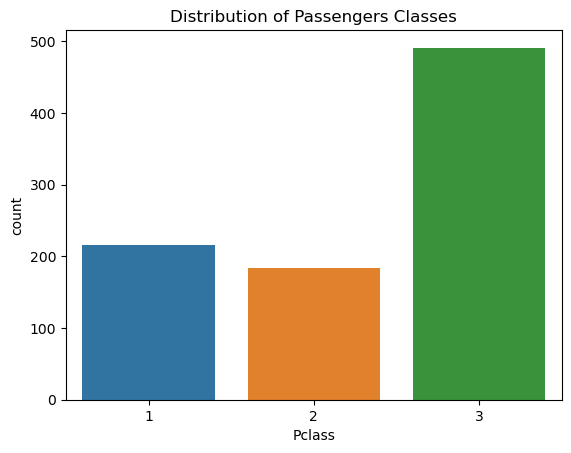

In [11]:
sns.countplot(x="Pclass",data=df)
plt.title("Distribution of Passengers Classes")
plt.show()


# Model Training

Feature & Target Variable

In [12]:
features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked_Q","Embarked_S"]
X = df[features]
y=df['Survived']

In [13]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Evaluate the model

In [16]:
y_pred = model.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy:{accuracy:.2f}")

Model Accuracy:0.83


In [18]:
classification = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       117
           1       0.75      0.77      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



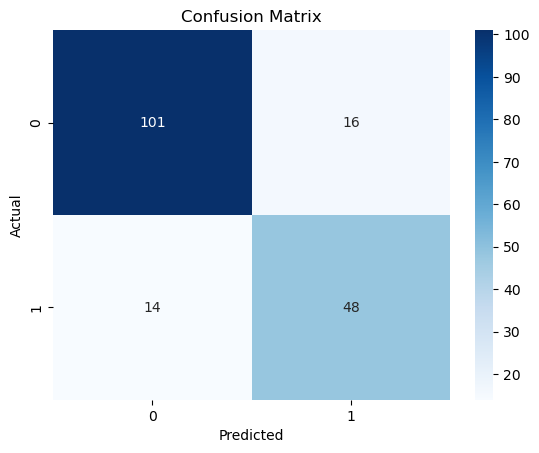

In [19]:
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

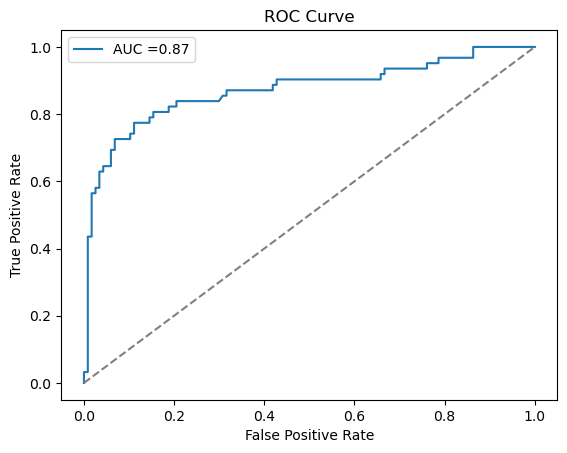

In [20]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr, label=f'AUC ={roc_auc:.2f}')
plt.plot([0,1],[0,1], linestyle='--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()